# Pymaceuticals - Miriam Berkowitz

### Analysis<br>
1. The drug Capomulin had the most favorable results. Average tumor volumes shrunk, there was lower metastatic spread, and fewer mice died than in the other treatments under analysis, including the placebo. <br>
2. Responses to Infubinol and Ketapril were very similar in average tumor volume change, metastatic spread and mouse survival.<br>
3. The placebo had very similar results to Infubinol and Ketapril in all areas analyzed.


In [1]:
from matplotlib import pyplot as plt
from scipy import stats

import numpy as np
import pandas as pd
from scipy.stats import sem
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#read the files
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")
clinicaltrial_data = pd.read_csv("clinicaltrial_data.csv")

In [3]:
#merge the tables on Mouse ID
merged_data = pd.merge(mouse_drug_data, clinicaltrial_data, on="Mouse ID")
merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
#only keep the data for the drugs that we are analyzing
only_some_drugs = merged_data.loc[(merged_data["Drug"] == "Capomulin") | (merged_data["Drug"] == "Infubinol")
               | (merged_data["Drug"] == "Ketapril")  | (merged_data["Drug"] == "Placebo") , :]
only_some_drugs.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


In [5]:
#group the data by drug and timepoint
drug_data = only_some_drugs.groupby(['Drug','Timepoint'])


## Tumor Response to Treatment

In [6]:
#compute the mean tumor volume per drug per time period
tumor_vol = pd.DataFrame(drug_data['Tumor Volume (mm3)'].mean())
tumor_vol.rename(columns={'Tumor Volume (mm3)':'mean tumor vol'},inplace = True)

tumor_vol.head()


mean tumor vol
Drug      Timepoint                
Capomulin 0               45.000000
          5               44.266086
          10              43.084291
          15              42.064317
          20              40.716325

In [7]:
#compute the standard error for the means
tumor_err = pd.DataFrame(drug_data['Tumor Volume (mm3)'].sem())
tumor_err.rename(columns={'Tumor Volume (mm3)':'sem tumor vol'},inplace = True)
tumor_err.reset_index(inplace=True)
tumor_err.head()


,Drug,Timepoint,sem tumor vol
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
#reset the index
tumor_vol.reset_index(inplace=True)

In [9]:
#pivot to display all the mean tumor volume for each drug over time
pivot_tumor_vol = tumor_vol.pivot(index='Timepoint', columns='Drug', values='mean tumor vol')
pivot_tumor_vol.reset_index(inplace=True)
pivot_tumor_vol

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


In [10]:
# set up lists for all the scatter plots
drugs = ['Capomulin','Infubinol', 'Ketapril','Placebo']
colors = ['red','blue','green','black']
formats = ['o','^','s','D']


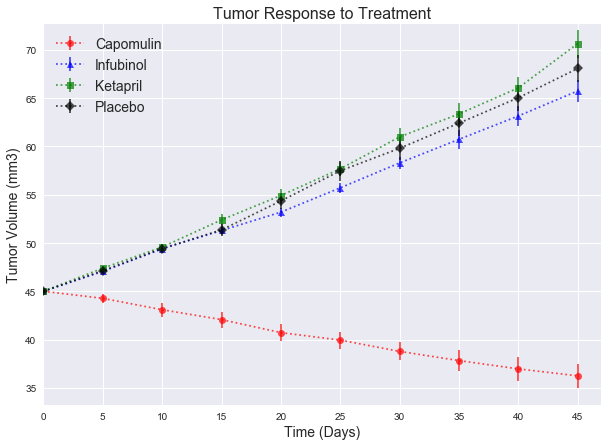

In [11]:
#plot tumor vol using matplotlib, including error bars

fig, ax = plt.subplots(figsize=(10,7))

#loop through the drugs to include on the plot
for i in range(0,len(drugs)):

   
    #x-axis is timepoint for the particular drug
    drug_data_to_plot = tumor_vol.loc[tumor_vol['Drug'] == drugs[i],:]
    x_axis = drug_data_to_plot['Timepoint']
      
    #y-axis is tumor volume
    y_axis = drug_data_to_plot['mean tumor vol'] 

    #errors is the standard error
    err_data_to_plot = tumor_err.loc[tumor_err['Drug'] == drugs[i],:]
    errors = err_data_to_plot['sem tumor vol']
   
   
    #plot the data and the error
    ax.errorbar(x_axis, y_axis, yerr=errors, fmt=formats[i], marker = formats[i], color=colors[i],
            alpha=0.7, label=drugs[i],ls='dotted')
           
    ax.set_xlabel("Time (Days)",fontsize=14)
    ax.set_ylabel("Tumor Volume (mm3)",fontsize=14)
    ax.set_title("Tumor Response to Treatment",fontsize=16)
    #add the legend
    ax.legend(loc="best", fontsize=14,fancybox=True)
    
    plt.xticks(x_axis, x_axis)
    ax.set_xlim(0, x_axis.max() + 2)
    ax.set_ylim(tumor_vol['mean tumor vol'].min()-3, tumor_vol['mean tumor vol'].max()+2)
        
#end loop

plt.show()

## Metastatic Response to Treatment

In [12]:
#compute the mean metastatic sites per drug per time period
metas_sites = pd.DataFrame(drug_data['Metastatic Sites'].mean())
metas_sites.rename(columns={'Metastatic Sites':'Mean Metastatic Sites'},inplace = True)
metas_sites.reset_index(inplace=True)


In [13]:
#compute the error from the means
metas_err = pd.DataFrame(drug_data['Metastatic Sites'].sem())
metas_err.rename(columns={'Metastatic Sites':'sem metas sites'},inplace = True)
metas_err.reset_index(inplace=True)


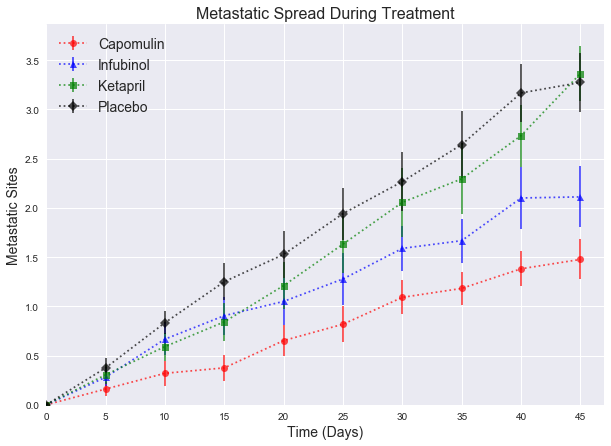

In [14]:
fig, ax = plt.subplots(figsize=(10,7))

#loop through the drugs to include on the plot
for i in range(0,len(drugs)):

   
    #x-axis is timepoint for the particular drug
    drug_data_to_plot = metas_sites.loc[metas_sites['Drug'] == drugs[i],:]
    x_axis = drug_data_to_plot['Timepoint']
      
    #y-axis is metastatic sites
    y_axis = drug_data_to_plot['Mean Metastatic Sites'] 

    #errors is the standard error
    err_data_to_plot = metas_err.loc[metas_err['Drug'] == drugs[i],:]
    errors = err_data_to_plot['sem metas sites']
   
   
    #plot the data and the error
    ax.errorbar(x_axis, y_axis, yerr=errors, fmt=formats[i], marker = formats[i], color=colors[i],
            alpha=0.7, label=drugs[i],ls='dotted')
        
    ax.set_xlabel("Time (Days)",fontsize=14)
    ax.set_ylabel("Metastatic Sites",fontsize=14)
    ax.set_title("Metastatic Spread During Treatment",fontsize=16)
    #add the legend
    ax.legend(loc="best", fontsize=14,fancybox=True)
    
    plt.xticks(x_axis, x_axis)
    ax.set_xlim(0, x_axis.max() + 2)
    ax.set_ylim(0.0, metas_sites['Mean Metastatic Sites'].max()+0.5)
        
#end loop

plt.show()



## Survival Rates

In [15]:
#compute the mouse count at each time period
#group the data by drug and timepoint
time_data = only_some_drugs.groupby(['Timepoint','Drug'])
time_data.head()
time_data['Mouse ID'].count()

survival = pd.DataFrame(time_data['Mouse ID'].count())

survival.rename(columns={'Mouse ID':'mouse_count'},inplace = True)
survival.reset_index(inplace=True)
survival.head()


,Timepoint,Drug,mouse_count
0,0,Capomulin,25
1,0,Infubinol,25
2,0,Ketapril,25
3,0,Placebo,25
4,5,Capomulin,25


In [16]:
#resort by drug and time
survival_drug = survival.sort_values(['Drug','Timepoint'])
survival_drug.head()

,Timepoint,Drug,mouse_count
0,0,Capomulin,25
4,5,Capomulin,25
8,10,Capomulin,25
12,15,Capomulin,24
16,20,Capomulin,23


In [17]:
#pivot to display mouse counts for each drug over time
pivot_mouse = survival_drug.pivot(index='Timepoint', columns='Drug', values='mouse_count')
pivot_mouse

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [18]:
#get drug and number of mice at timepoint 0
orig_mice = survival_drug.loc[(survival_drug["Timepoint"] == 0),:]
orig_mice.rename(columns={'mouse_count':'total_mice'},inplace = True)
del orig_mice['Timepoint']

orig_mice

/Users/miriamberkowitz/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Drug,total_mice
0,Capomulin,25
1,Infubinol,25
2,Ketapril,25
3,Placebo,25


In [19]:
#merge the table with the original total mouse count with survival_drug
merge_survival = pd.merge(survival_drug, orig_mice, on="Drug")
merge_survival.head()

,Timepoint,Drug,mouse_count,total_mice
0,0,Capomulin,25,25
1,5,Capomulin,25,25
2,10,Capomulin,25,25
3,15,Capomulin,24,25
4,20,Capomulin,23,25


In [20]:
#store the percentage of mice still alive
merge_survival["percent_alive"] = merge_survival['mouse_count'] / merge_survival['total_mice'] * 100

#only keep the drugs we need to display
merge_survival.head()


,Timepoint,Drug,mouse_count,total_mice,percent_alive
0,0,Capomulin,25,25,100.0
1,5,Capomulin,25,25,100.0
2,10,Capomulin,25,25,100.0
3,15,Capomulin,24,25,96.0
4,20,Capomulin,23,25,92.0


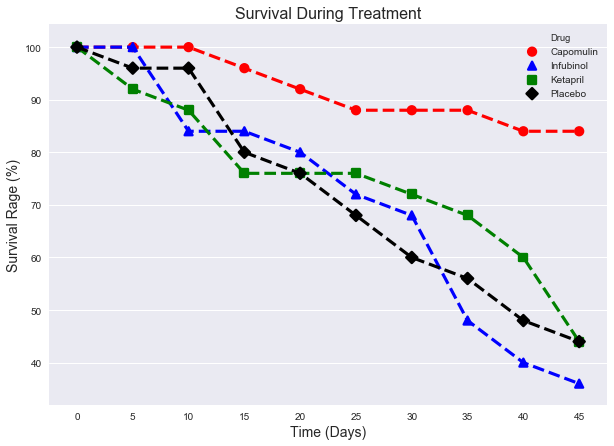

In [21]:
#PLOT Survival Using SEABORN

fig, ax = plt.subplots(figsize=(10,7))
g = sns.pointplot(x="Timepoint", y="percent_alive", hue=merge_survival['Drug'], data=merge_survival, markers=formats, palette=colors, linestyles="--")


g.figure.set_size_inches(10,7)
ax.set_xlabel("Time (Days)",fontsize=14)
ax.set_ylabel("Survival Rage (%)",fontsize=14)
ax.set_title("Survival During Treatment",fontsize=16)
plt.show()

## Total Percentage of Tumor Volume Change 

In [22]:
min_timepoint = clinicaltrial_data['Timepoint'].min()
max_timepoint = clinicaltrial_data['Timepoint'].max()

In [23]:
tumor_diffs = [(pivot_tumor_vol.iloc[9,:] - pivot_tumor_vol.iloc[0,:]) / pivot_tumor_vol.iloc[0,:] * 100]
tumor_diffs

[Drug
 Timepoint          inf
 Capomulin   -19.475303
 Infubinol    46.123472
 Ketapril     57.028795
 Placebo      51.297960
 dtype: float64]

In [24]:
# #put tumor_diffs into a dataframe
# diffs = pd.DataFrame(tumor_diffs)
# diffs

In [25]:
# diffs_t = diffs.transpose()
# diffs_t.reset_index(inplace=True)


In [26]:
#tumor differences data frame
final_product = pd.DataFrame({"drugs":tumor_diffs[0].index, "values":tumor_diffs[0].values})
final_product

,drugs,values
0,Timepoint,inf
1,Capomulin,-19.475303
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Placebo,51.297960


In [27]:
#remove 0th row 
final_product.drop([0],inplace=True)
final_product

,drugs,values
1,Capomulin,-19.475303
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Placebo,51.297960


In [28]:
#add color for chart
final_product['color'] = np.where(final_product['values']>1.0, 'red', 'green')
final_product

,drugs,values,color
1,Capomulin,-19.475303,green
2,Infubinol,46.123472,red
3,Ketapril,57.028795,red
4,Placebo,51.297960,red


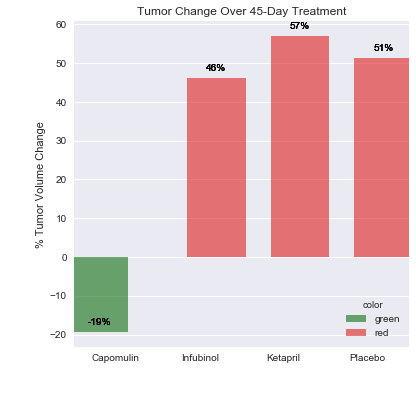

In [29]:
#use Seaborn to plot the bar chart

#function to make the bar width wider
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # change the bar width
        patch.set_width(new_value)

        # recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
#use red and green, set in the data     
custom_palette = final_product['color']
fig, ax = plt.subplots()
plt.title("Tumor Change Over 45-Day Treatment")

g = sns.barplot(x="drugs", y="values", data=final_product, hue = 'color', palette=custom_palette,alpha=0.6)
g.figure.set_size_inches(6,6)

#make the bar width wider
change_width(ax, 0.7)

#function to annotate the bars with the percentage
def annotateBars(row, ax=ax): 
    for p in ax.patches:
         ax.annotate('%.0f%%' % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
             textcoords='offset points')  

#add the annotation to the plot
plot = final_product.apply(annotateBars, ax=ax, axis=1)

plt.ylabel("% Tumor Volume Change")
plt.xlabel("")

plt.show()